status: Optimal
x 10.0
y 0.0
optimal 30.0


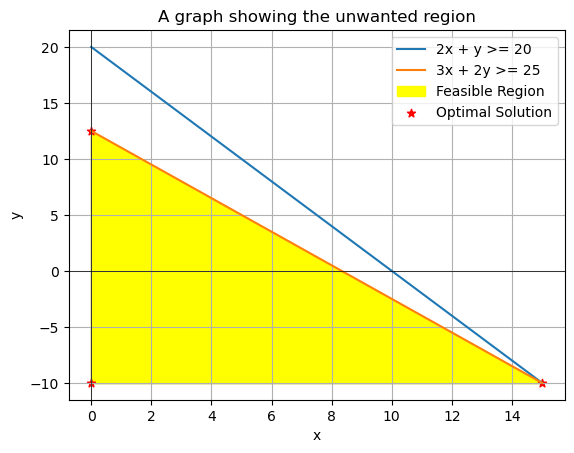

In [1]:
from pulp import*
import matplotlib.pyplot as plt
import numpy as np

#lpProblem
model = LpProblem(name="diet_optimization", sense=LpMinimize)

#LpVariables
x=LpVariable("x",0)
y=LpVariable("y",0)

#objective function
model+=3*x + 2*y

#constraints
model+= 2*x + y >= 20
model+=3*x + 2*y>= 25

#solving
model.solve()

#display results
x=x.varValue
y=y.varValue
optimal_value= model.objective.value()

print("status:",LpStatus[model.status])
print("x",x)
print("y",y)
print("optimal", optimal_value)



# Define the constraints
def constraint1(x):
    return 20 - 2*x

def constraint2(x):
    return (25 - 3*x) / 2

# Create x range for plotting
x_values = np.linspace(0, 15, 400)

# Plot constraints
plt.plot(x_values, constraint1(x_values), label='2x + y >= 20')
plt.plot(x_values, constraint2(x_values), label='3x + 2y >= 25')

# Shade unwanted region
x=[0,0,15]
y=[12.5,-10,-10]
plt.fill(x,y,color='gray')
plt.fill(x,y, color="yellow", label="Feasible Region")
plt.scatter(x, y, color='red', marker='*', label='Optimal Solution')


# Set labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('A graph showing the unwanted region')
plt.legend()

# Show plot
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()
